In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

In [10]:
train_path = 'train.csv' 
test_path = 'test.csv'   

In [11]:
train_data = pd.read_csv(train_path, sep=";")
test_data = pd.read_csv(test_path, sep=";")

In [12]:
combined_data = pd.concat([train_data, test_data], ignore_index=True)

In [13]:
print("Dataset Overview:")
print(combined_data.info())
print("\nMissing Values:\n", combined_data.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB
None

Missing Values:
 age          0
job          0
marital      0
education    

In [14]:
print("\nSummary Statistics:")
print(combined_data.describe())


Summary Statistics:
                age        balance           day      duration      campaign  \
count  49732.000000   49732.000000  49732.000000  49732.000000  49732.000000   
mean      40.957472    1367.761562     15.816315    258.690179      2.766549   
std       10.615008    3041.608766      8.315680    257.743149      3.099075   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    320.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  49732.000000  49732.000000  
mean      40.158630      0.576892  
std      100.127123      2.254838  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

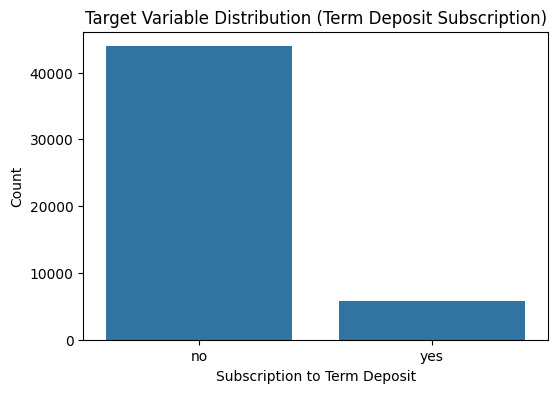

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x=combined_data['y'])
plt.title("Target Variable Distribution (Term Deposit Subscription)")
plt.xlabel("Subscription to Term Deposit")
plt.ylabel("Count")
plt.show()

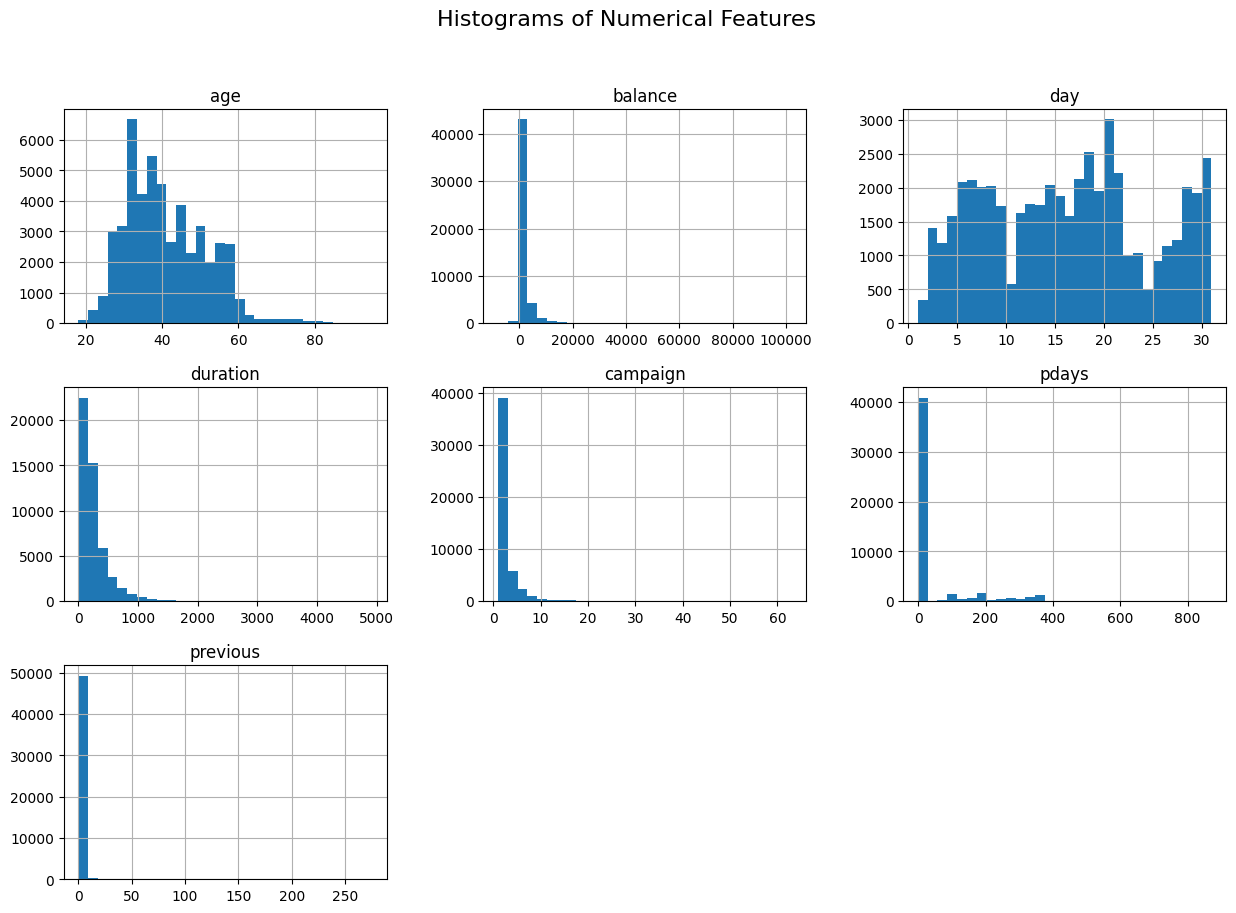

In [16]:
numerical_cols = combined_data.select_dtypes(include=["int64", "float64"]).columns
combined_data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

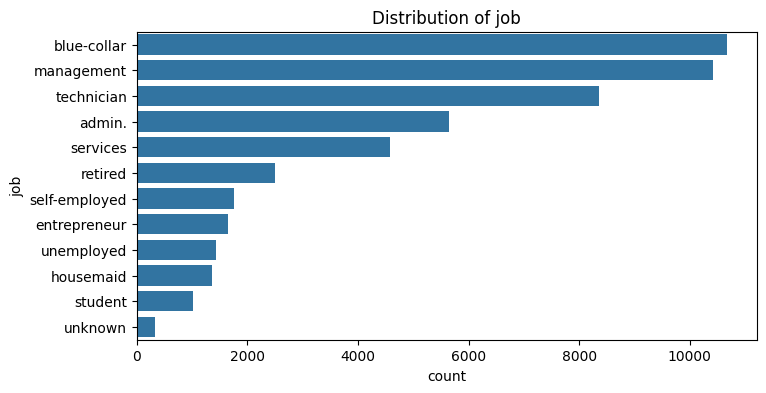

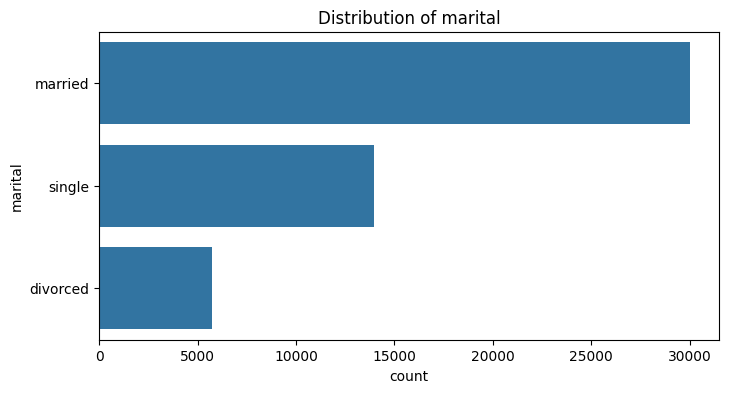

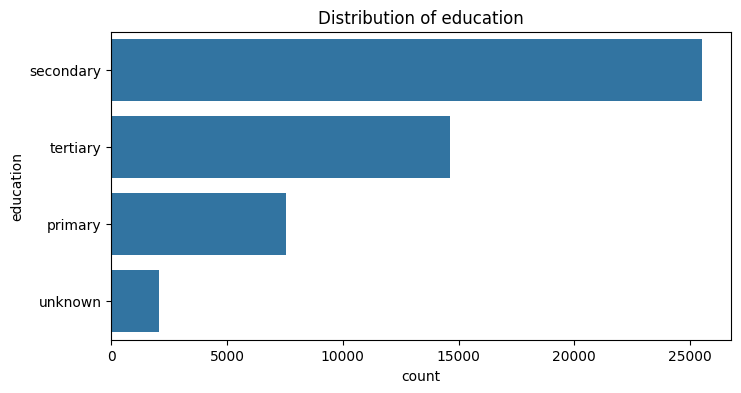

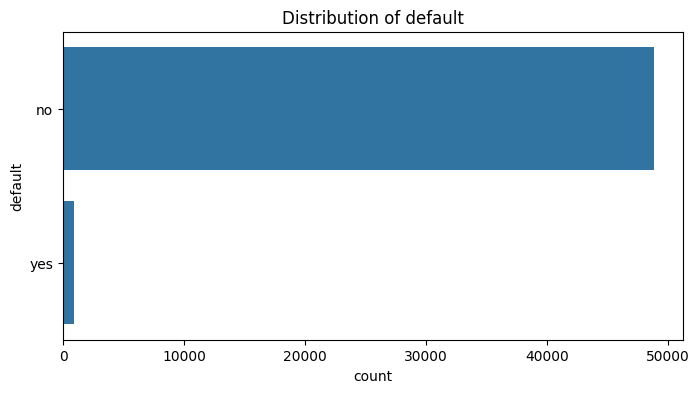

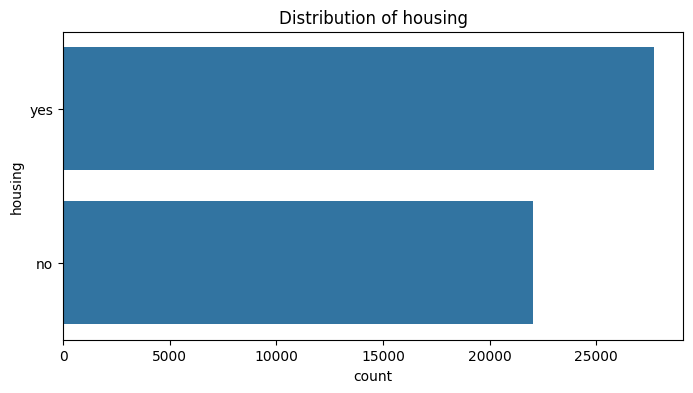

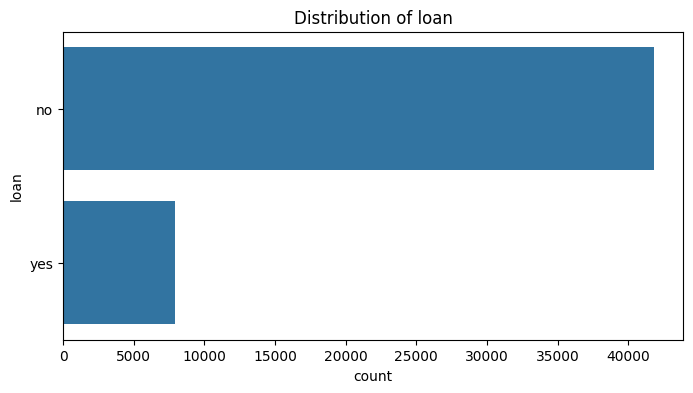

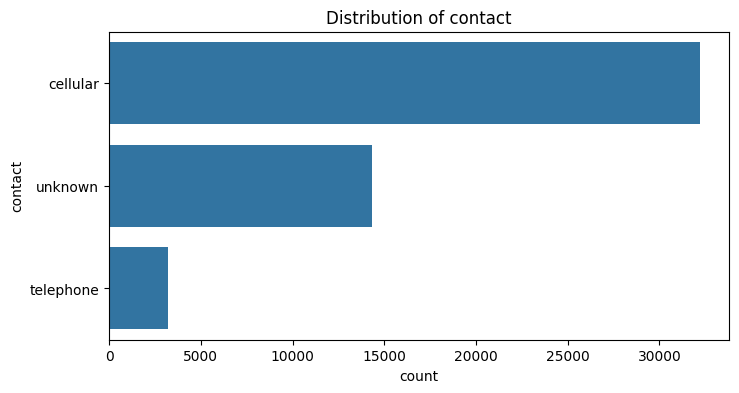

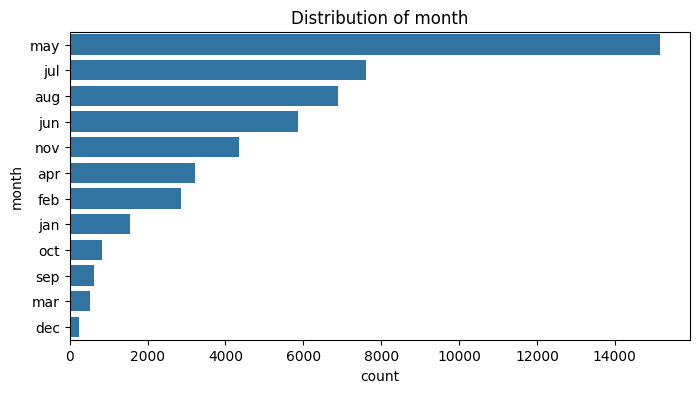

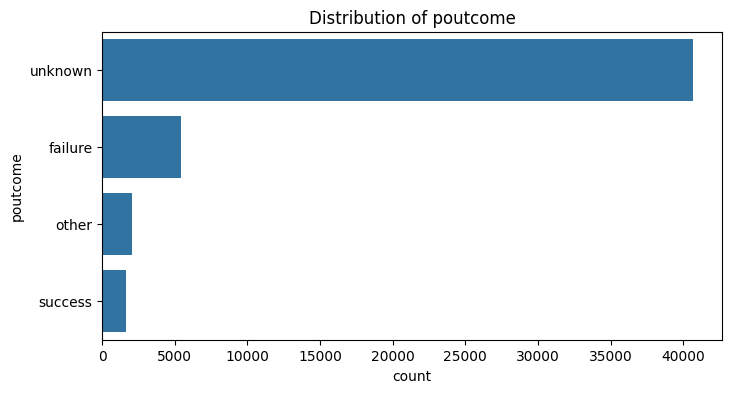

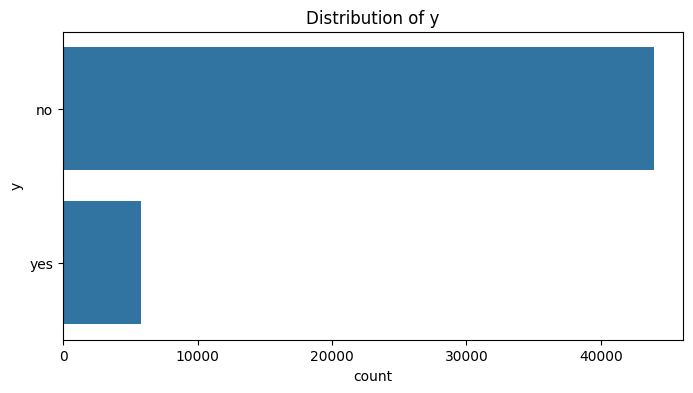

In [17]:
categorical_cols = combined_data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=combined_data[col], order=combined_data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

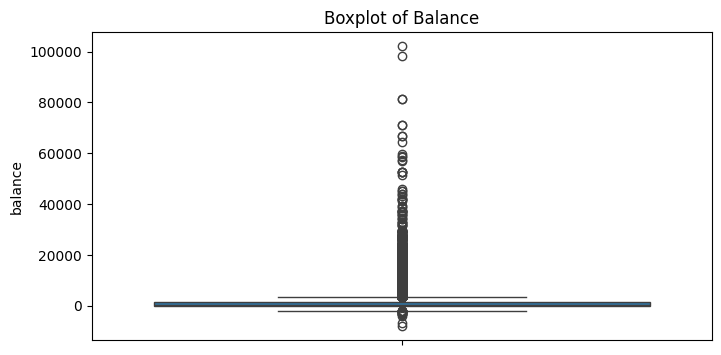

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(combined_data['balance'])
plt.title("Boxplot of Balance")
plt.show()

In [19]:
balance_99 = combined_data['balance'].quantile(0.99)
combined_data.loc[combined_data['balance'] > balance_99, 'balance'] = balance_99

/var/folders/1w/85n827hn1qx7xq3fxfdd4v1m0000gn/T/ipykernel_20092/3223842751.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13295.450000000012' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  combined_data.loc[combined_data['balance'] > balance_99, 'balance'] = balance_99


In [20]:
encoder = LabelEncoder()
encoded_categories = {} 
for col in categorical_cols:
    combined_data[col] = encoder.fit_transform(combined_data[col])
    encoded_categories[col] = encoder.classes_ 

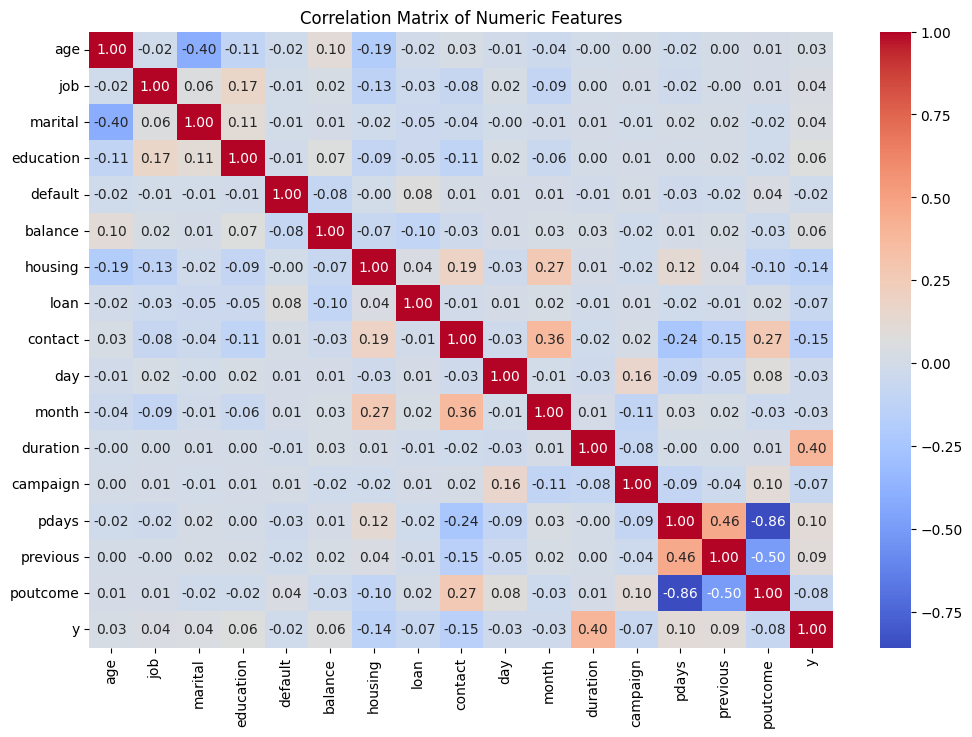

In [21]:
numeric_data = combined_data.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [22]:
combined_data['contact_rate'] = combined_data['campaign'] / (combined_data['previous'] + 1)

In [23]:
X = combined_data.drop(columns=['y'])
y = combined_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [26]:
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train_scaled, y_train_balanced)
random_forest_preds = random_forest_model.predict(X_test_scaled)

In [27]:
print("Random Forest Evaluation:")
print(classification_report(y_test, random_forest_preds))

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8785
           1       0.61      0.69      0.65      1162

    accuracy                           0.91      9947
   macro avg       0.78      0.82      0.80      9947
weighted avg       0.92      0.91      0.91      9947



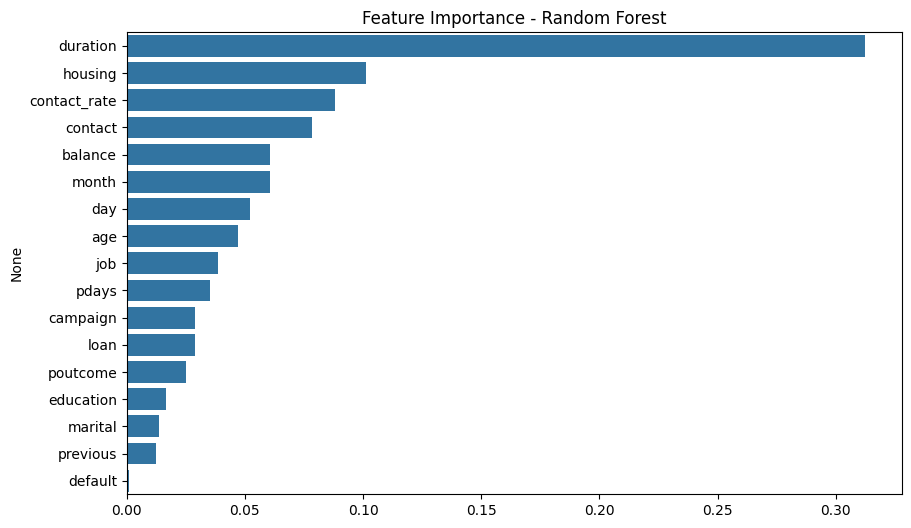

In [28]:
feature_importances = random_forest_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices])
plt.title("Feature Importance - Random Forest")
plt.show()

In [29]:
columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
           'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

In [30]:
new_data_points = [
    [59, 'admin.', 'married', 'secondary', 'no', 2343, 'yes', 'no', 'unknown', 5, 'may', 1042, 1, -1, 0, 'unknown']
]

In [31]:
input_data = pd.DataFrame(new_data_points, columns=columns)

In [32]:
input_data['contact_rate'] = input_data['campaign'] / (input_data['previous'] + 1)

In [33]:
for col in categorical_cols:
    if col in input_data.columns:
        input_data[col] = input_data[col].apply(
            lambda x: np.where(encoded_categories[col] == x, np.arange(len(encoded_categories[col])), -1)[0]
            if x in encoded_categories[col] else -1
        )

In [34]:
missing_cols = set(X.columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0 

In [35]:
input_scaled = scaler.transform(input_data)

In [36]:
prediction = random_forest_model.predict(input_scaled)[0]
probability = random_forest_model.predict_proba(input_scaled)[0][1] * 100

In [37]:
print(f"The probability of this lead converting into a customer is: {probability:.2f}%")

The probability of this lead converting into a customer is: 79.00%
